### Import Modules and Python Functions

In [1]:
import os
import numpy as np
import pandas as pd
import yaml
with open('../python/variables.yaml') as info:
    VARS = yaml.load(info, Loader=yaml.FullLoader)

# visualization modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from random import randint
from pylab import rcParams

### Import Variables

In [2]:
# Events
events_csv = VARS['EVENTS_CSV']
events_cols_all = VARS['EVENTS_COLS_ALL']
events_cols_select = VARS['EVENTS_COLS_SELECT']

# Mentions
mentions_csv = VARS['MENTIONS_CSV']
mentions_cols_all = VARS['MENTIONS_COLS_ALL']
mentions_cols_select = VARS['MENTIONS_COLS_SELECT']

# Pilot
cameo_verbs = VARS['CAMEO_VERBS']
cameo_quadclass = VARS['CAMEO_QUADCLASS']
select_countries_60 = VARS['PILOT_COUNTRIES_IOS2']

### Define Reusable Python Functions

In [3]:
def get_var_percentages(df: pd, target_col: str, sort=False) -> pd:
    """Get Percentage of Column Values in Target Column of Cleaned GDELT Data
    :param df: dataframe of cleaned data
    :param target_col: column name of variable of interest
    :rtype: dataframe
    :return: dataframe
    """

    # Create a sub-dataframe to group GLOBALEVENTID by Target Column
    grouped_df = df[['GLOBALEVENTID', target_col]].groupby(target_col).count()
    
    # Get variable percentage                                                                
    grouped_df['%'] = (grouped_df['GLOBALEVENTID'] / grouped_df['GLOBALEVENTID'].sum()) * 100
    
    if sort==True:
        grouped_df = grouped_df.sort_values(by='%', ascending=False).reset_index()
    
    return grouped_df

In [4]:
def plot_piechart(df: pd, target_cols: str, pie_title: str, save_png: str) -> pd:
    """ Create colorful pie chart showing percent of events by variable label
    :param df: dataframe created via the get_var_percentages() function
    :param target_cols: target column in the get_var_percentages() function
    :param pie_title: target column string for pie chart title
    :param save_png: string based on the target column for storing png
    """
    # Create color list for pie chart visualization
    labels = df[target_cols]
    colors = []
    for i in range(len(labels)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    if len(np.unique(labels)) > 8:
        rcParams['figure.figsize'] = 30,30
    else:
        rcParams['figure.figsize'] = 8,8

    # Plot
    plt.pie(df['%'], colors=colors, labels=labels, autopct='%1.1f%%')
    plt.title('Percentage of Events by '+ pie_title)
    plt.savefig('../images/conflict_' + save_png + '.png', dpi=300)
    plt.show()

### Import Data

In [5]:
# Store dataframe globally
%store -r cleaned_merged_df
print(cleaned_merged_df.shape)
cleaned_merged_df.head()

(1273, 14)


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,DaysBetween,Confidence,MentionDocTone,ActionGeo_CountryCode,ActionGeo_FullName,EventCode,QuadClass,GoldsteinScale,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
0,972833876,2021-03-04 18:45:00,2021-03-04 18:45:00,0,10,5.288462,US,"Baltimore, Maryland, United States",51,1,3.4,39.2904,-76.6122,https://patch.com/maryland/fallston/boyle-buic...
1,972833877,2021-03-04 18:45:00,2021-03-04 18:45:00,0,10,5.288462,US,"Maryland, United States",51,1,3.4,39.0724,-76.7902,https://patch.com/maryland/fallston/boyle-buic...
2,972833878,2021-03-04 18:45:00,2021-03-04 18:45:00,0,30,5.084746,US,"Long Island, California, United States",10,1,0.0,38.1669,-121.6250,http://www.nydailynews.com/snyde/ny-party-down...
3,972833879,2021-03-04 18:45:00,2021-03-04 18:45:00,0,40,0.223714,RS,Russia,50,1,3.5,60.0000,100.0000,http://www.tribtown.com/2021/03/04/ap-eu-virus...
4,972833880,2021-03-04 18:45:00,2021-03-04 18:45:00,0,50,0.641849,IN,"Ahmedabad, Gujarat, India",120,3,-4.0,23.0333,72.6167,https://www.business-standard.com/article/opin...


### Select Conflict Data (QuadClass=[3,4])

In [6]:
conflict_df = cleaned_merged_df.loc[ cleaned_merged_df['QuadClass'].isin([3,4]) ].reset_index(drop=True)
print(conflict_df.shape)
conflict_df.head()

(405, 14)


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,DaysBetween,Confidence,MentionDocTone,ActionGeo_CountryCode,ActionGeo_FullName,EventCode,QuadClass,GoldsteinScale,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
0,972833880,2021-03-04 18:45:00,2021-03-04 18:45:00,0,50,0.641849,IN,"Ahmedabad, Gujarat, India",120,3,-4.0,23.033300,72.616700,https://www.business-standard.com/article/opin...
1,972833883,2021-03-04 18:45:00,2021-03-04 18:45:00,0,100,-2.212389,BB,Barbados,160,4,-4.0,13.166667,-59.533333,https://barbadostoday.bb/2021/03/04/uk-could-i...
2,972833891,2021-03-04 18:45:00,2021-03-04 18:45:00,0,30,0.000000,US,"Los Angeles County, California, United States",190,4,-10.0,34.366700,-118.201000,https://www.courthousenews.com/pelosi-denies-s...
3,972833892,2021-03-04 18:45:00,2021-03-04 18:45:00,0,20,0.000000,US,"Georgia, United States",190,4,-10.0,32.986600,-83.648700,https://www.courthousenews.com/pelosi-denies-s...
4,972833895,2021-03-04 18:45:00,2021-03-04 18:45:00,0,50,3.225806,US,"New York, United States",111,3,-2.0,42.149700,-74.938400,https://www.vladtv.com/article/270115/square-a...


In [7]:
conflict_df.columns

Index(['GLOBALEVENTID', 'EventTimeDate', 'MentionTimeDate', 'DaysBetween',
       'Confidence', 'MentionDocTone', 'ActionGeo_CountryCode',
       'ActionGeo_FullName', 'EventCode', 'QuadClass', 'GoldsteinScale',
       'ActionGeo_Lat', 'ActionGeo_Long', 'SOURCEURL'],
      dtype='object')

## Assess Metrics

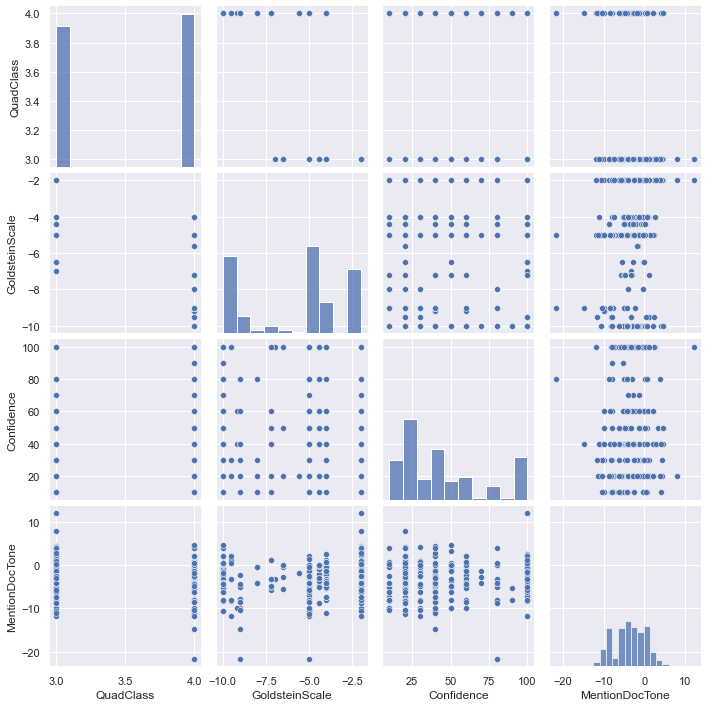

In [8]:
sns.pairplot(conflict_df[['QuadClass','GoldsteinScale','Confidence','MentionDocTone']])

Observations: Similar to what was noted in the previous, total, in a brief exploration of correlation of variable relationships, there doesn't appear to be any sort of visually detectable relationship between the general tone (MentionDocTone) of a source, the validity score (Confidence) of a source to the resulting behavioral (Quad) class and calculated Goldstein score of an event; there is a visually detectable relationship between between the behavioral (Quad) class and Goldstein score of an event, which is to be expected. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 1: What is the Percentage of Events per QuadClass? What is the MODE Confidence and Tone per QuadClass?

#### Percentage of Events by QuadClass

In [9]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass = get_var_percentages(conflict_df, 'QuadClassString', sort=True)
quadclass

KeyError: "['QuadClassString'] not in index"

#### Visualize

In [ ]:
plot_piechart(quadclass, 'QuadClassString', 'Cameo Quad Class in Conflict', 'cameo_quadclass_percentages')

In [ ]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass without US 
non_us_df = conflict_df.loc[ conflict_df['ActionGeo_CountryCode'] != 'US' ]
non_us_quadclass = get_var_percentages(non_us_df, 'QuadClassString')
non_us_quadclass

#### By Country

In [ ]:
len(conflict_df['ActionGeo_CountryCode'].unique())

In [ ]:
country_conflicts_df = conflict_df[['ActionGeo_CountryCode', 'QuadClassString', 'GLOBALEVENTID']].groupby(
    ['ActionGeo_CountryCode', 'QuadClassString'], as_index=False).count()
country_conflicts_df.columns = ['Country', 'QuadClass', 'Number Events']
country_conflicts_df.head()

In [ ]:
# plot
sns.barplot(x='Country', y='Number Events', hue='QuadClass', data=country_conflicts_df)
plt.show()

In [ ]:
# plot
non_us_conflict_df = country_conflicts_df.loc[ country_conflicts_df['Country'] != 'US']
sns.barplot('Country', y='Number Events', hue='QuadClass', data=non_us_conflict_df)
plt.show()

Observations: While this needs to be assessed with more data, it appears that the US has substantially more records when compared to all other countries within this dataset. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

Observations: While this needs to be assessed with more data, it does appear that QuadClass 1, meaning Verbal Cooperation, is the most prevelant, followed by QuadClass 4, Material Cooperation. However, is based on the previous section, it would be worthwhile to remove US-associated events and re-assess. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

#### Specifically Explore Conflict in:
- Afghanistan (AF)
- Myanmar (MM)
- 

In [ ]:
# create subdf
known_conflict_df = country_conflicts_df.loc[ country_conflicts_df['Country'].isin(['AF', 'MM'])]
print(known_conflict_df.shape)
known_conflict_df.head()

#### Mode of Confidence and MentionDocTone Values by QuadClass

In [ ]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass_modes = conflict_df[['QuadClass','Confidence','MentionDocTone']
                                   ].groupby('QuadClass').agg(lambda x: pd.Series.mode(x)[0])
quadclass_modes

Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 2: What is the Percentage of Events per EventRootCode? What is the MODE Confidence and Tone per EventRootCode?

In [ ]:
# Create a sub-dataframe to group GLOBALEVENTID by EventRootCode
cameoaction = get_var_percentages(conflict_df, 'EventRootCodeString', sort=True)
cameoaction

#### Visualize

In [ ]:
plot_piechart(cameoaction, 'EventRootCodeString', 'Cameo Event Root Verb', 'cameo_verb_percentages')

Observations: This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 3: What is the Count of EventRootCodes by QuadClass? (ie. does is match the documentation?)

In [ ]:
quadclass_events = conflict_df[['GLOBALEVENTID','QuadClass','QuadClassString','EventRootCodeString']].groupby(['QuadClass','QuadClassString','EventRootCodeString']).count()
print(quadclass_events.shape)
quadclass_events